In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("/content/Iris.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 6)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df = df.drop(columns=["Id"])

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.shape

(150, 5)

In [13]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
data_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 3


In [16]:
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


In [17]:
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
The Value Count of Float Columns is : 4


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

<Axes: >

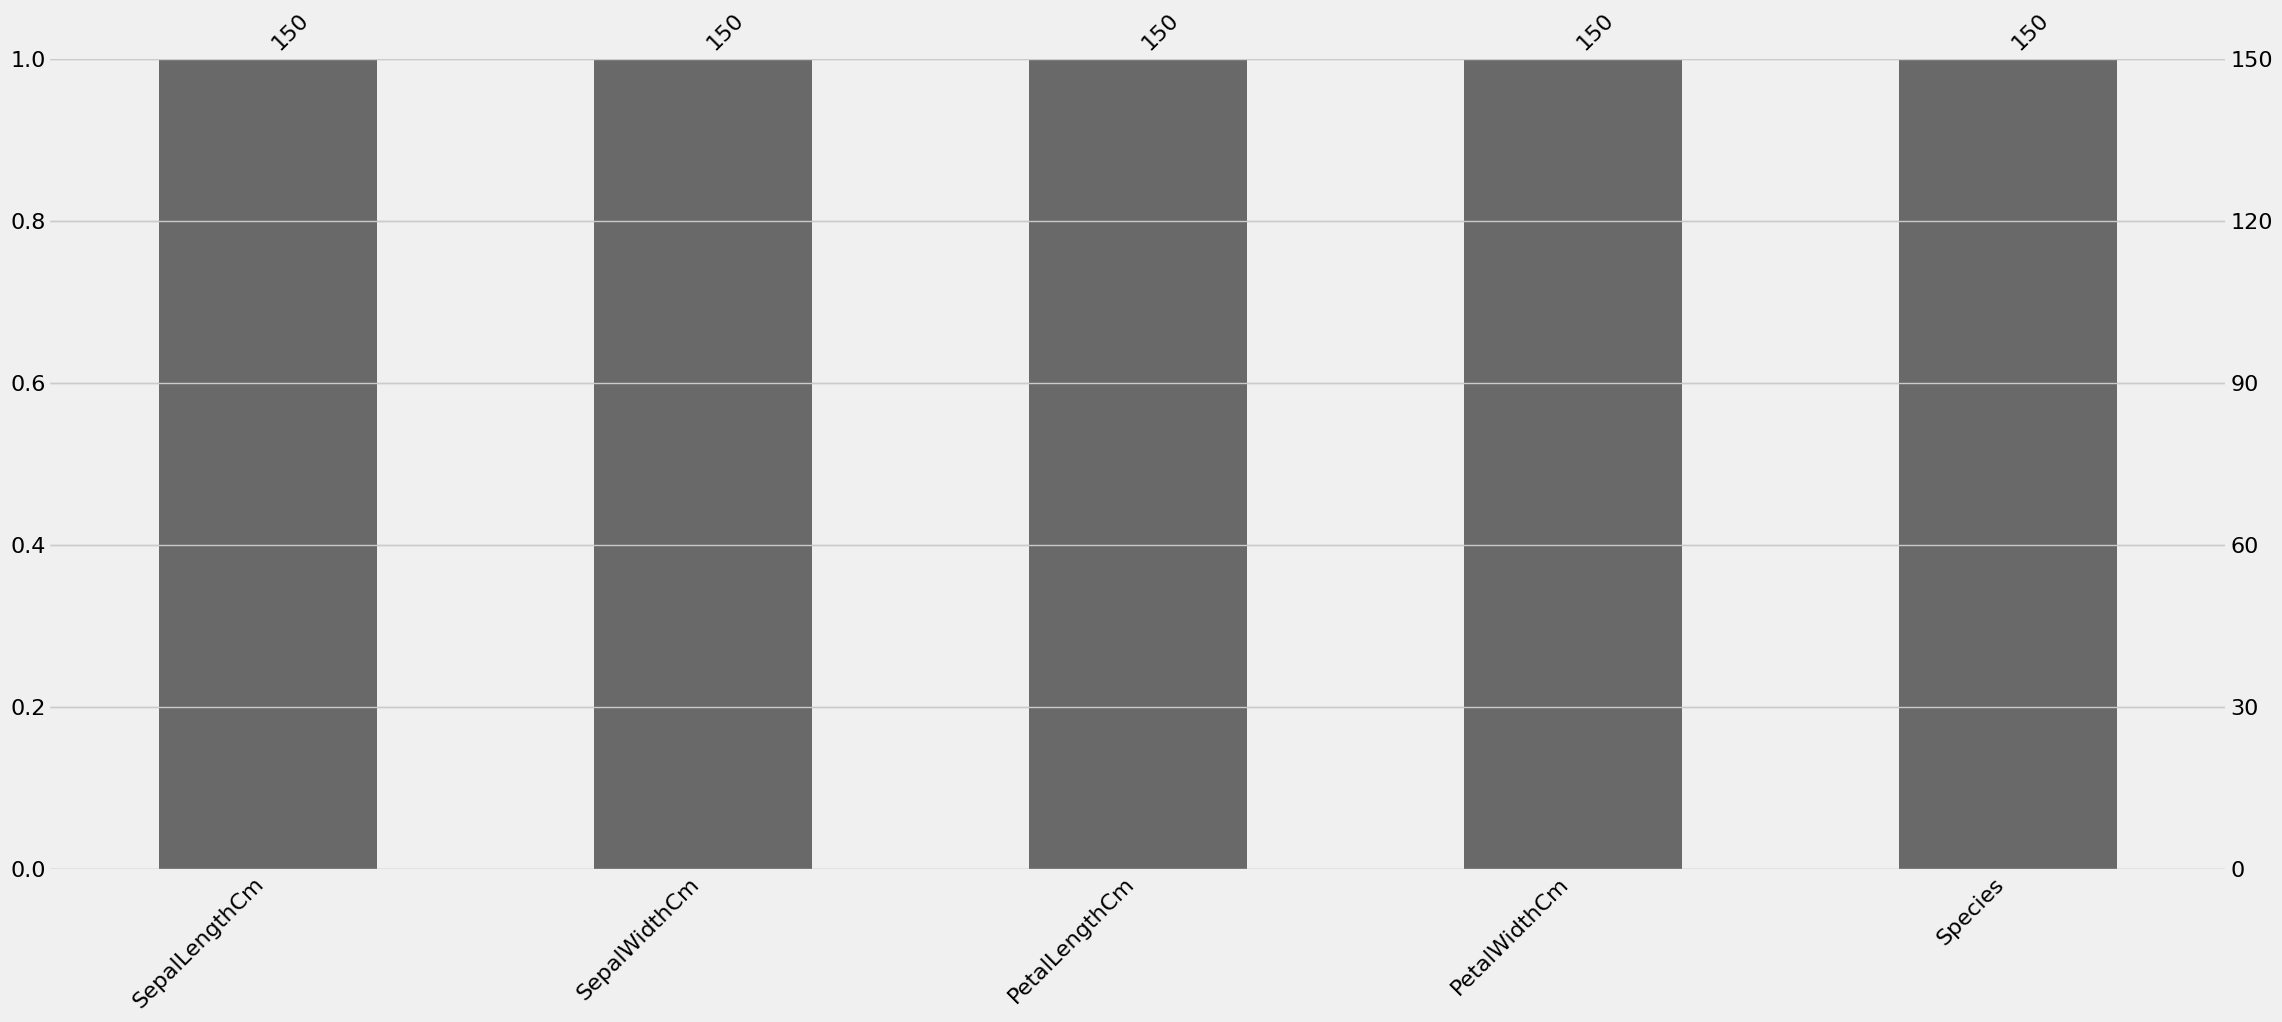

In [19]:
import missingno as msno
msno.bar(df)

In [20]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='Species', ylabel='count'>

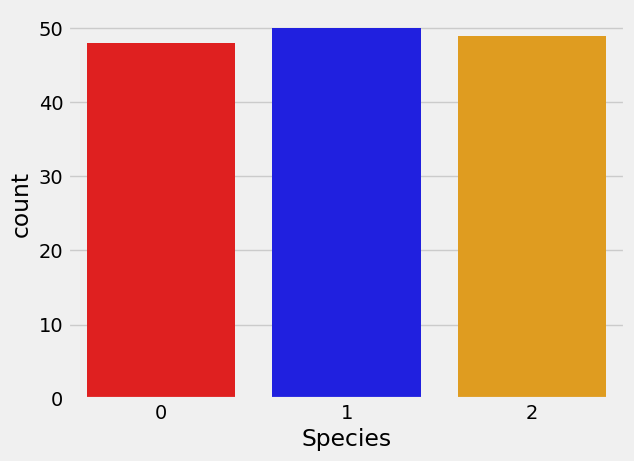

In [21]:
sns.countplot(x='Species',data=df,palette=['red','blue','orange'])

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

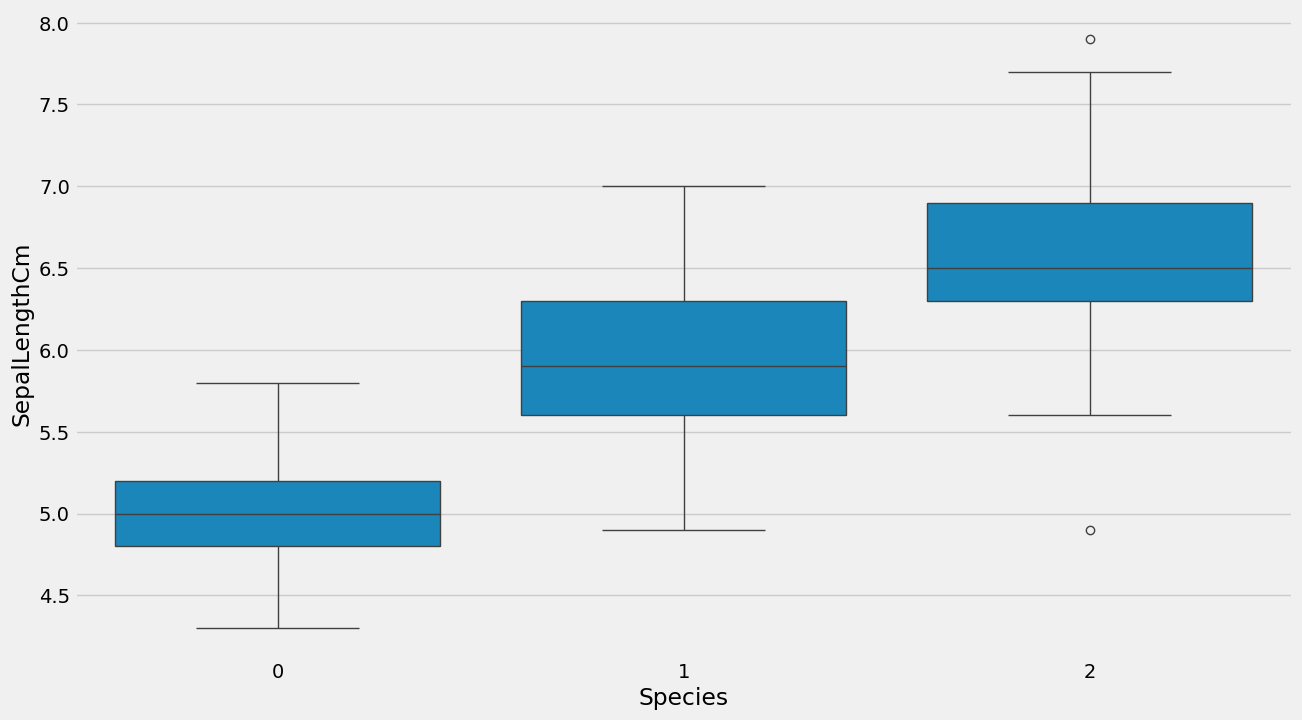

In [22]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=True))

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

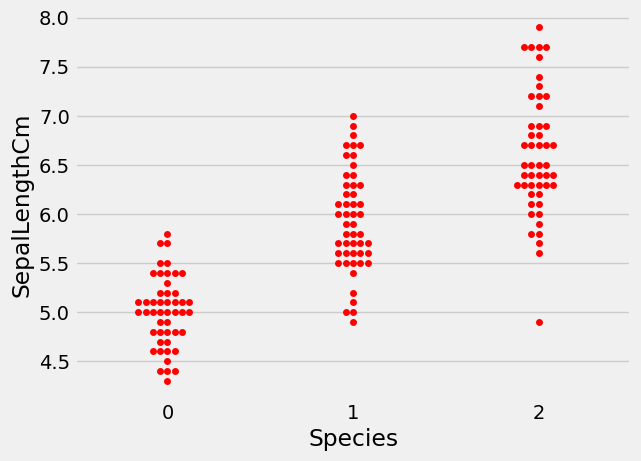

In [23]:
sns.swarmplot(x=df['Species'],y=df['SepalLengthCm'],color='red')

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

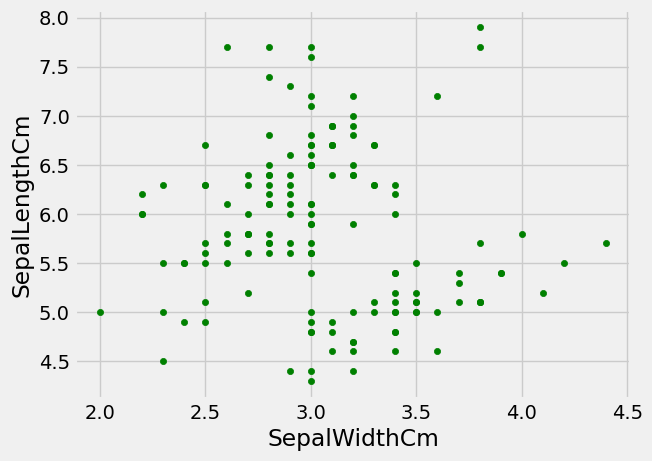

In [24]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm',color='g')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

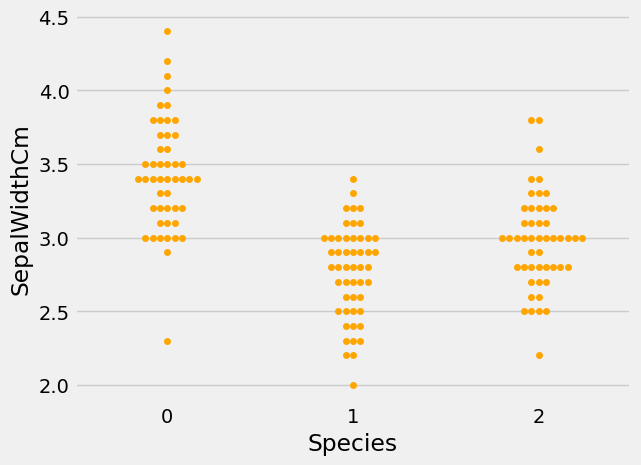

In [25]:
sns.swarmplot(x=df['Species'],y=df['SepalWidthCm'],color='orange')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

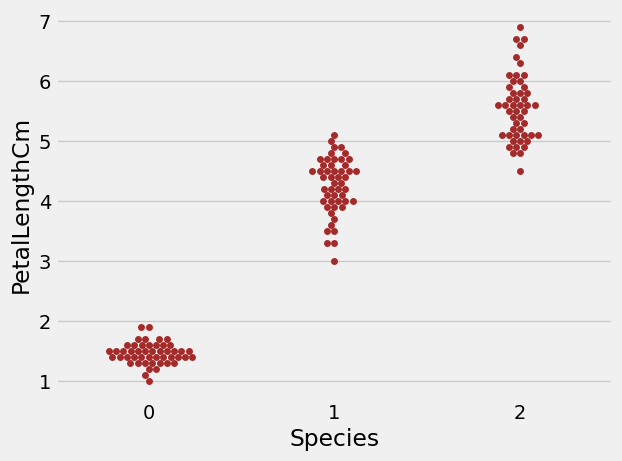

In [26]:
sns.swarmplot(x=df['Species'],y=df['PetalLengthCm'],color='brown')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

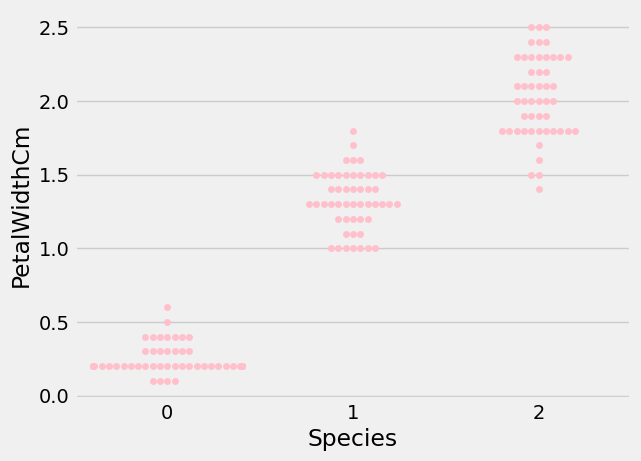

In [27]:
sns.swarmplot(x=df['Species'],y=df['PetalWidthCm'],color='pink')

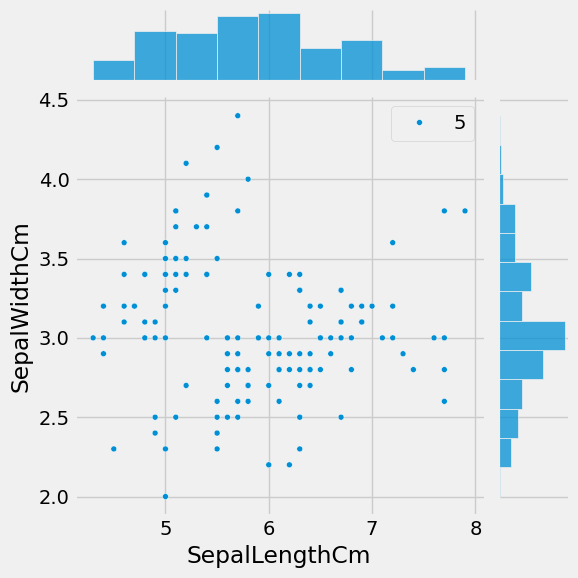

In [28]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

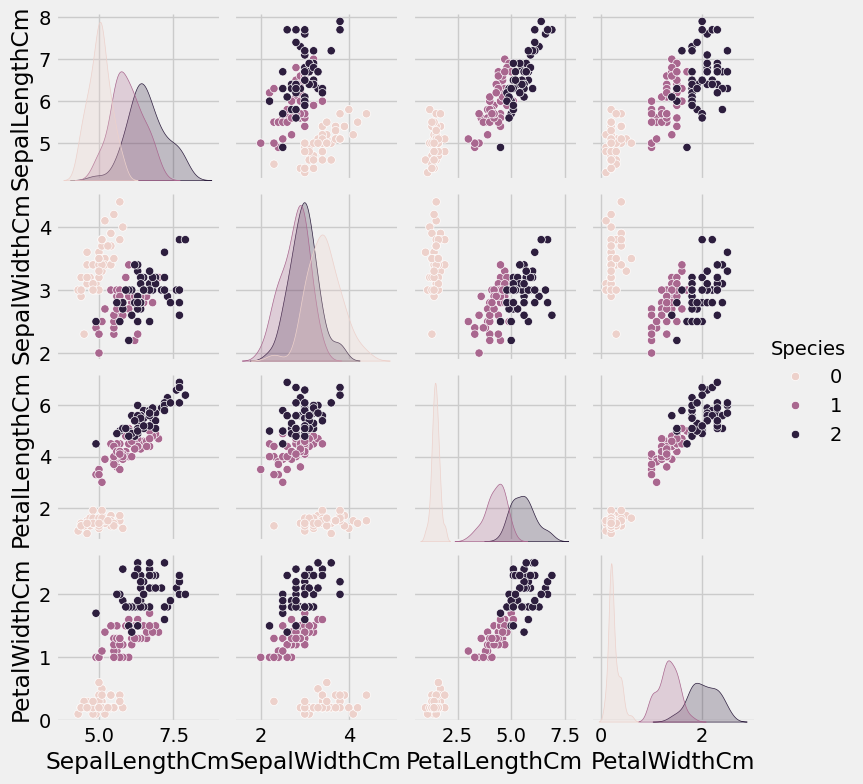

In [29]:
sns.pairplot(df, hue="Species", size=2)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

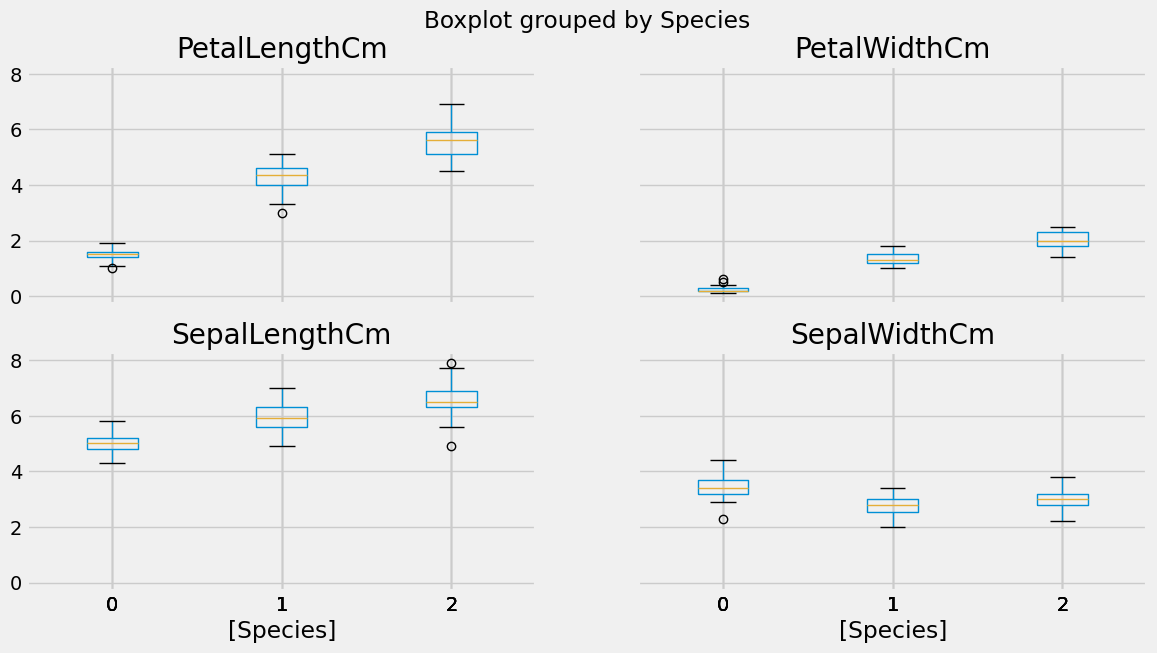

In [30]:
df.boxplot(by="Species", figsize=(14, 7))

<Axes: >

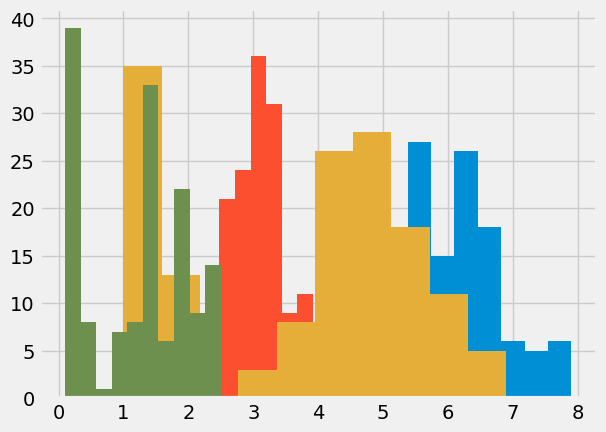

In [31]:
#Plotting the histogram of all features toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

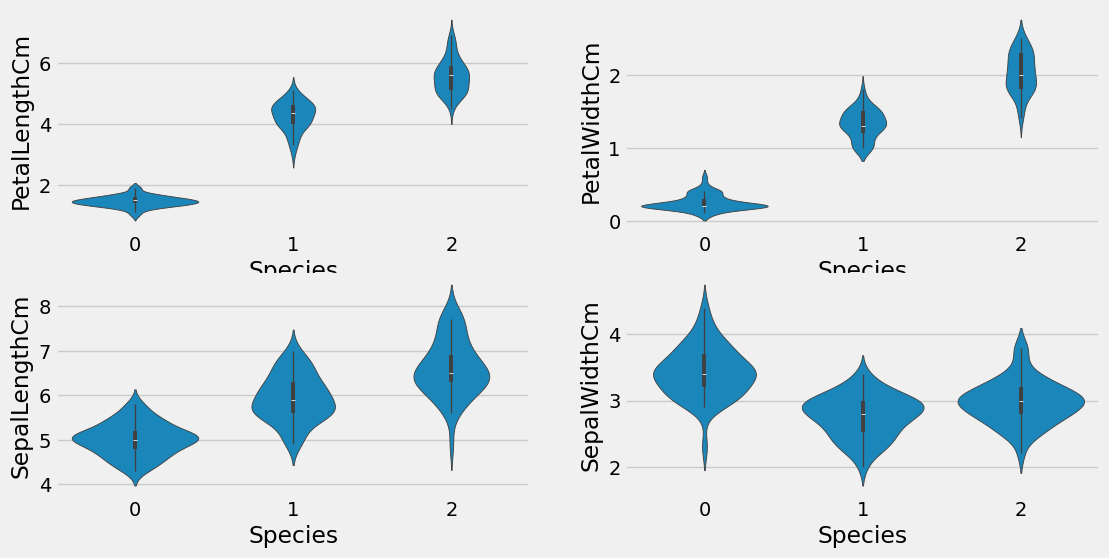

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [33]:
X = df.drop(columns=['Species'])
Y = df['Species']

In [34]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logreg_Accuracy = logmodel.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", logreg_Accuracy)

Accuracy (Logistic Regression):  93.33333333333333


In [36]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
dt_Accuracy = dtmodel.score(x_test,y_test)*100
print("Accuracy (Decision Tree): ", dt_Accuracy)

Accuracy (Decision Tree):  93.33333333333333


In [37]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
knn_Accuracy = knnmodel.score(x_test,y_test)*100
print("Accuracy (KNN): ", knn_Accuracy)

Accuracy (KNN):  96.66666666666667


In [38]:
#svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine classifier
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(x_train, y_train)

# Calculate the accuracy on the testing data
svm_accuracy = svm_model.score(x_test, y_test) * 100
print("Accuracy (SVM): {:.2f}%".format(svm_accuracy))


Accuracy (SVM): 100.00%


In [39]:
#random forest model
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Calculate the accuracy on the testing data
rf_accuracy = rf_model.score(x_test, y_test) * 100
print("Accuracy (Random Forest): {:.2f}%".format(rf_accuracy))

Accuracy (Random Forest): 100.00%


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
y_pred1 = logmodel.predict(x_test)
y_pred2 = knnmodel.predict(x_test)
y_pred3 = dtmodel.predict(x_test)
y_pred4 = svm_model.predict(x_test)
y_pred5 = rf_model.predict(x_test)

In [42]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
conf_matrix5 = confusion_matrix(y_test, y_pred5)

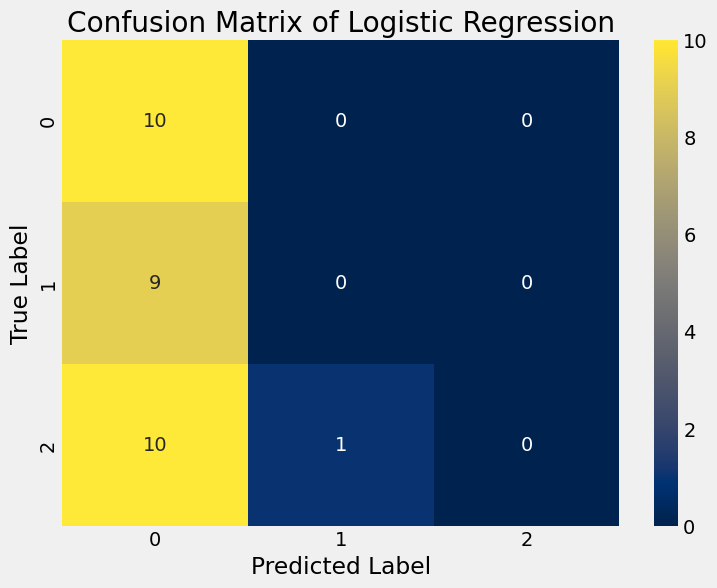

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

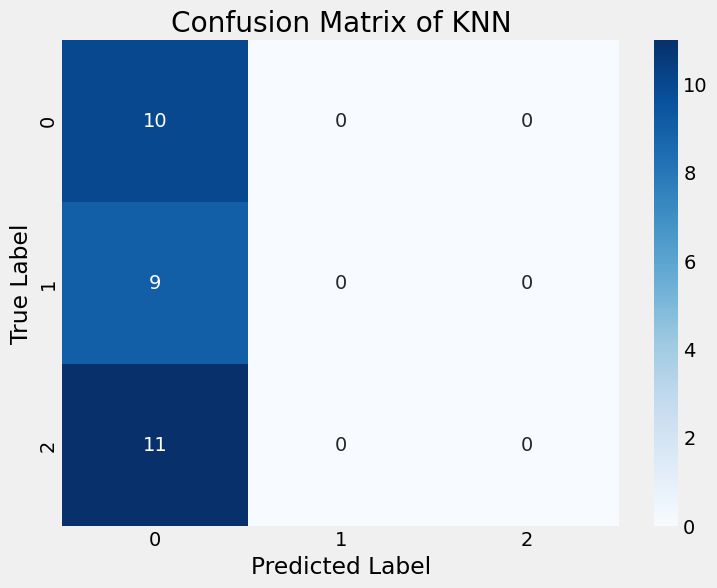

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

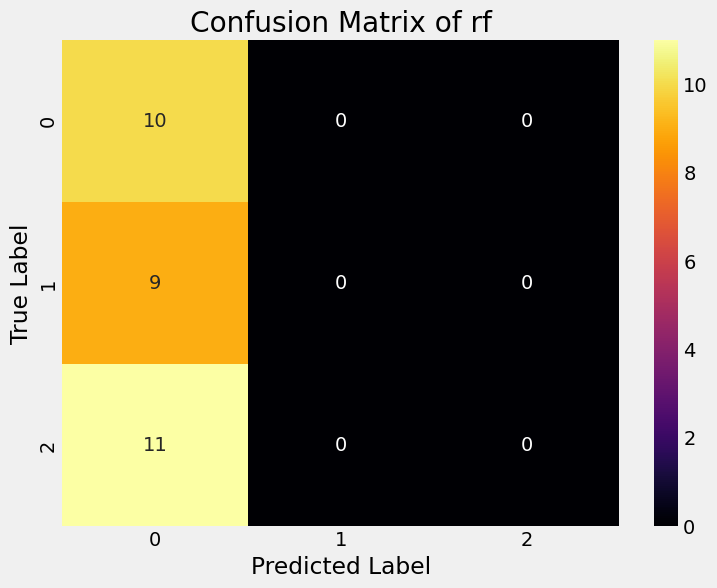

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of rf')
plt.show()

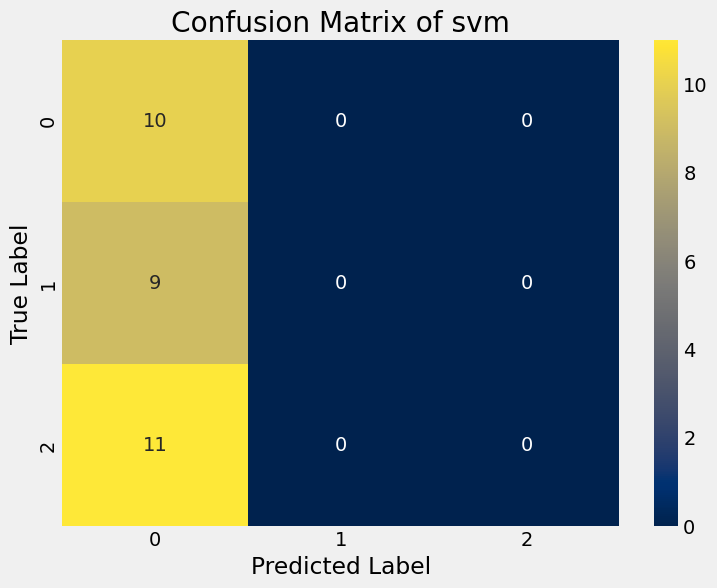

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of svm')
plt.show()

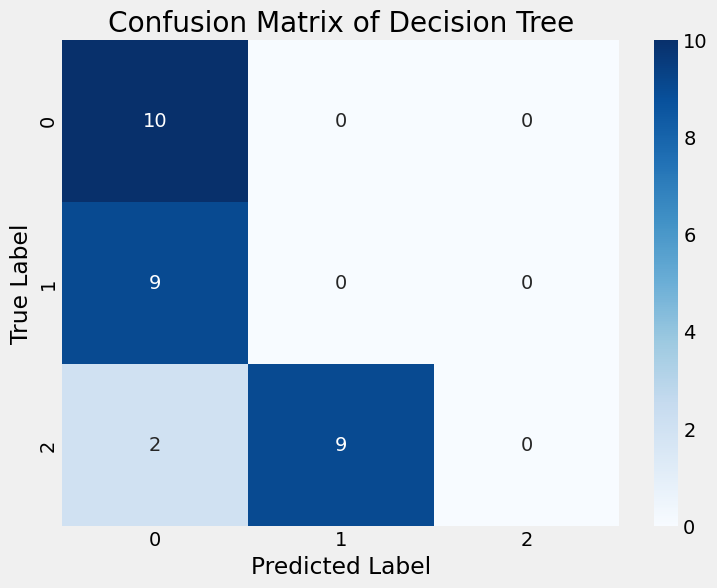

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

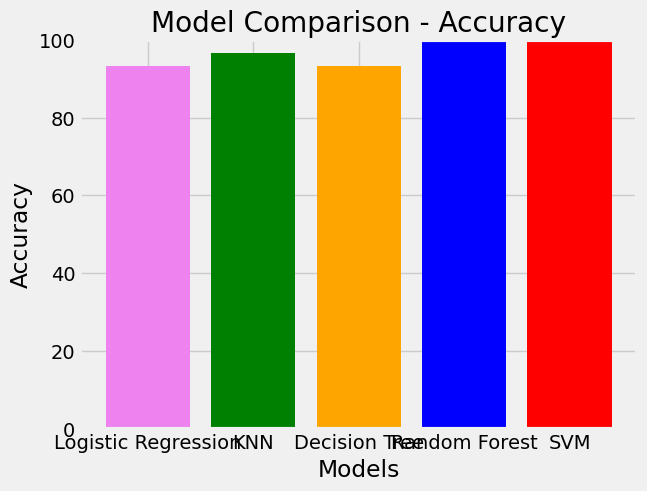

In [48]:
import matplotlib.pyplot as plt

# Assuming you have calculated the accuracies for all models
logreg_Accuracy = 93.3
knn_Accuracy = 96.66
dt_Accuracy = 93.3
rf_Accuracy = 100.0
svm_Accuracy = 100.0

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [logreg_Accuracy, knn_Accuracy, dt_Accuracy, rf_Accuracy, svm_Accuracy]

plt.bar(models, accuracies, color=['violet', 'green', 'orange', 'blue', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()
